In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
plt.rc('figure', figsize=(16,9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=13)

np.random.seed(13)

The actual probability of winning is 0.25


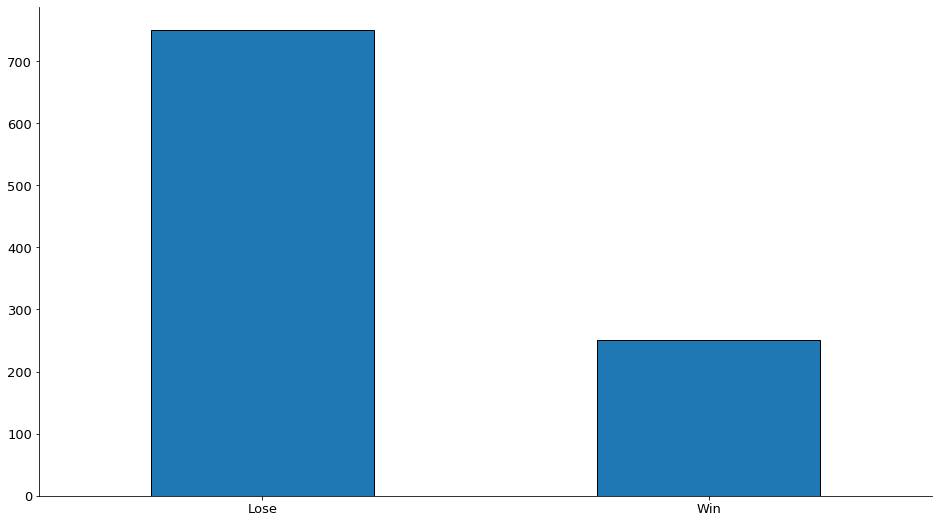

In [3]:
tickets = pd.Series([True] * 250 + [False] * 750)
tickets.value_counts().set_axis(['Lose', 'Win']).plot.bar()
plt.xticks(rotation=0)
print('The actual probability of winning is %.2f' % tickets.mean())

In [4]:
n = 25
tickets.sample(n).mean()

0.12

In [5]:
[tickets.sample(n).mean() for _ in range(5)]

[0.28, 0.28, 0.08, 0.24, 0.36]

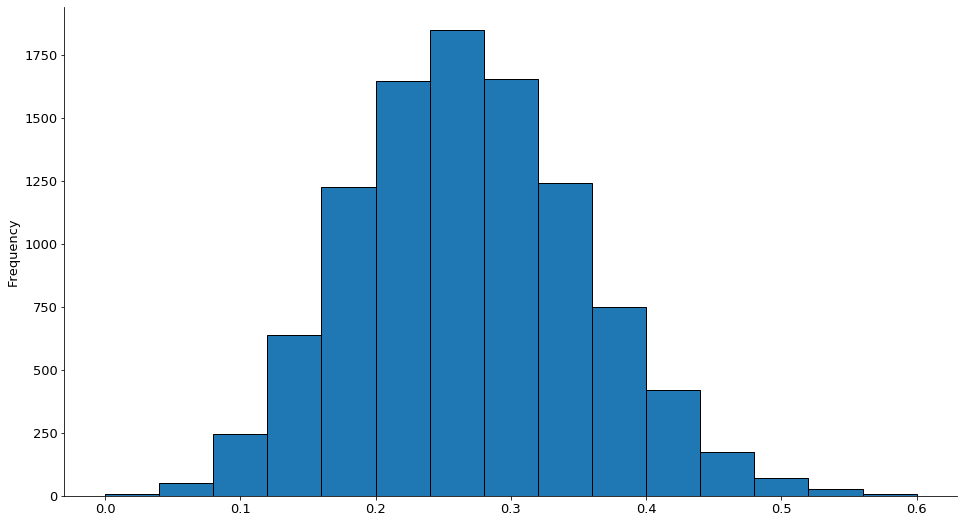

In [6]:
calculated_winrates = pd.Series([tickets.sample(n).mean() for _ in range(10_000)])
calculated_winrates.plot.hist(bins=15)

In [7]:
n_trials = nrows = 10_000
n_dice = ncols = 6

rolls = np.random.choice([1, 2, 3, 4, 5, 6], n_trials * n_dice).reshape(nrows, ncols)
rolls

array([[3, 1, 4, 2, 5, 2],
       [6, 4, 3, 4, 5, 5],
       [4, 3, 6, 4, 5, 4],
       ...,
       [2, 1, 5, 3, 4, 4],
       [1, 1, 4, 4, 5, 5],
       [5, 1, 4, 6, 4, 6]])

In [8]:
rolls.sum(axis=1).mean()

20.9906

In [9]:
df = pd.DataFrame(rolls)

In [10]:
df.sum(axis=1).mean()

20.9906

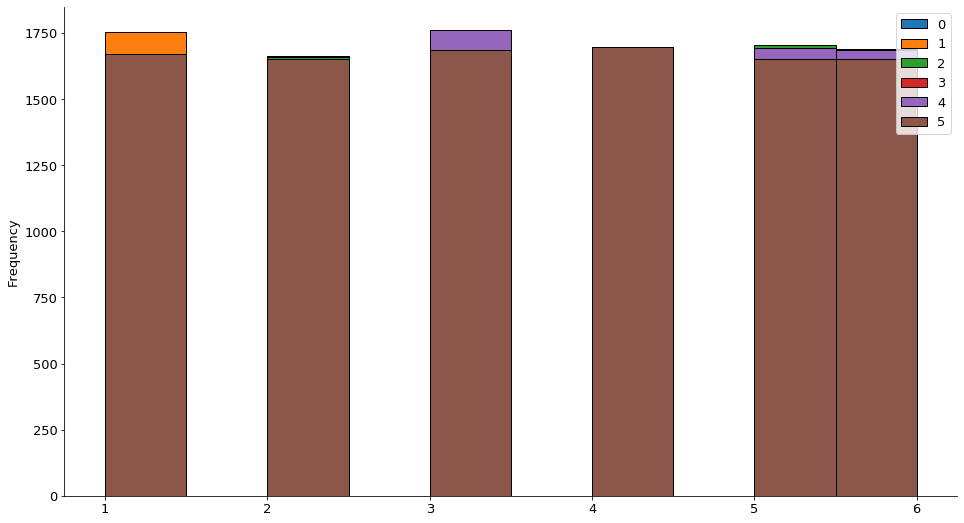

In [11]:

df.plot.hist()

In [12]:
se = math.sqrt((.25 * .75) / n)

In [13]:
print('SE:                 %.4f' % se)
print('sample_means.std(): %.4f' % calculated_winrates.std())

SE:                 0.0866
sample_means.std(): 0.0857


In [14]:
mean = calculated_winrates.mean()
sd = calculated_winrates.std()

stats.norm(mean, sd).cdf(.2)

0.28283511827393837

Are the average grades in web development vs data science classes different?
Null-There is no difference in average grades in web dev vs. data science.
Alt-There is a significant difference in grades between the two programs.
True Positive-We reject null hypothesis. There is a difference in grades.
True Negative-There is no difference in grades between the programs.
Type I Error-We incorrectly affirmed the null hypothesis because there actually is a diff but we didn't recognize it.
Type II Error-We incorrectly rejected the null hypothesis, saying there was a difference between programs when there actually wasn't

Is there a relationship between how early a student shows up to class and their grade?
Null-There is no relationship between how early a student shows up to class and their grade.
Alt-How early a student shows up does have a significant effect on their grade.
True Positive- We reject null hypothesis, how early a student gets up does effect their grade.
True Negative- There is no relationship between how early a student shows up to class and their grade.
Type I Error- We incorrectly affirmed the null hypothesis because there was a significant relationship and we didn't recognize it.
Type II Error- We incorrectly rejected the null hypothesis, saying there was a relationship when there actually wasn't.

Are web dev or data science students more likely to be coffee drinkers?
Null-Web dev or ds students are not more likely to be coffee drinkers compared to the general population.
Alt-Web dev or ds students are significantly more likely to be coffee drinkers vs the general population.
True Positive-We reject the null, Web dev and ds are in fact more likely to be coffee drinkers than the general population.
True Negative-There is no evidence to support that Codeup students are more likely to drink coffee.
Type I Error-We incorrectly affirmed the null because there was evidence to affirm and we didn't see it.
Type II Error-We incorrectly rejected the null hypothesis, saying there was evidence and there actually wasn't. 

Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
Are compact cars more fuel-efficient than the average car?
Do manual cars get better gas mileage than automatic cars?

In [3]:
from pydataset import data

mpg = data('mpg')

In [16]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [17]:
mpg['combined_mileage'] = (mpg.cty + mpg.hwy) / 2 

In [18]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,combined_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


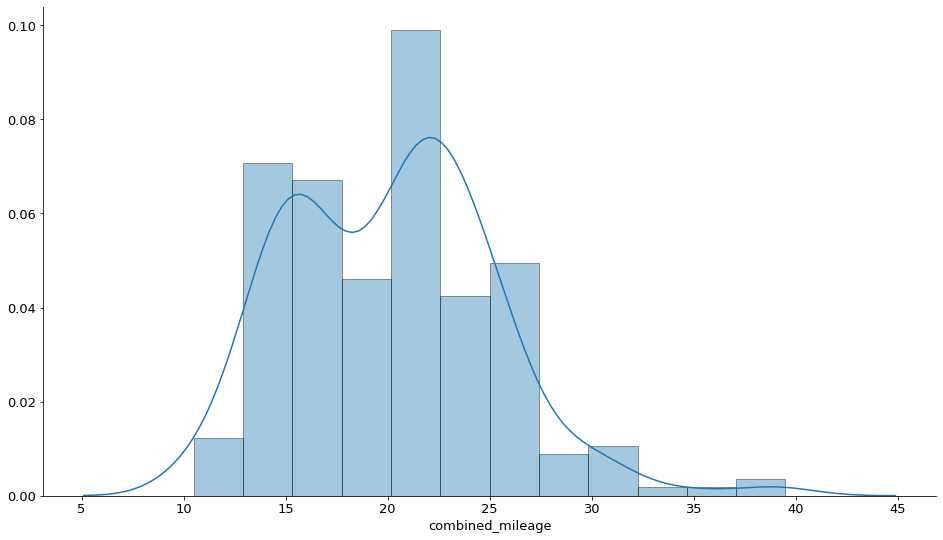

In [19]:
sns.distplot(mpg.combined_mileage)


In [20]:
two_thousand_eight = mpg[mpg.year== 2008].combined_mileage
nineteen_ninetynine = mpg[mpg.year== 1999].combined_mileage

In [21]:
alpha = .05

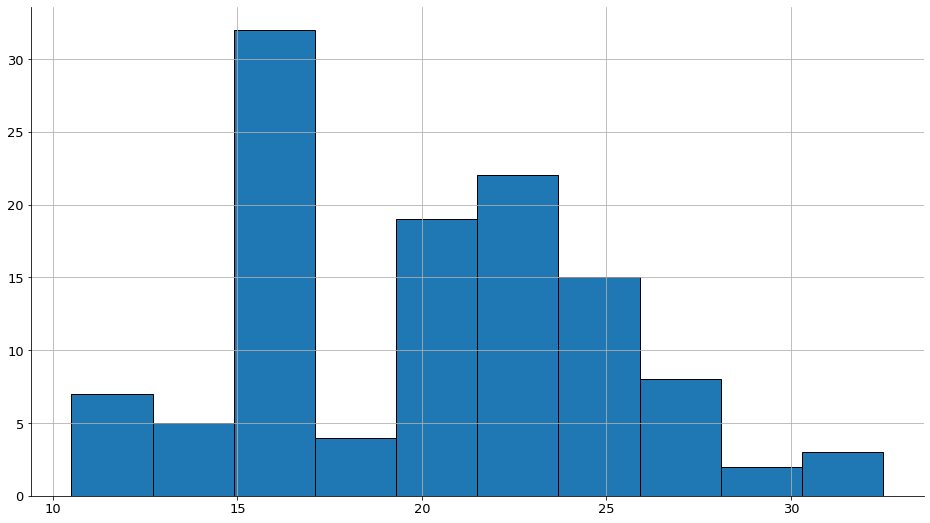

In [22]:
two_thousand_eight.hist()

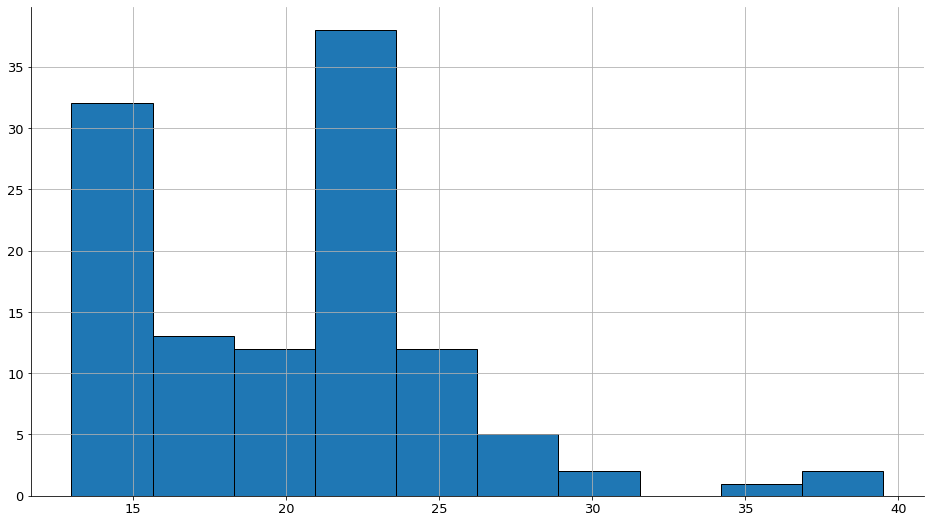

In [23]:
nineteen_ninetynine.hist()

In [24]:
print(two_thousand_eight.var())
print(nineteen_ninetynine.var())

24.097480106100797
27.122605363984682


In [25]:
t, p = stats.ttest_ind(two_thousand_eight, nineteen_ninetynine)

In [26]:
t


-0.21960177245940962

In [27]:
p

0.8263744040323578

In [48]:
print("Reject $H_{0}$? ", p < alpha)

Reject $H_{0}$?  True


In [29]:
compact = mpg[mpg['class'] == 'compact'].combined_mileage
overall = mpg.combined_mileage

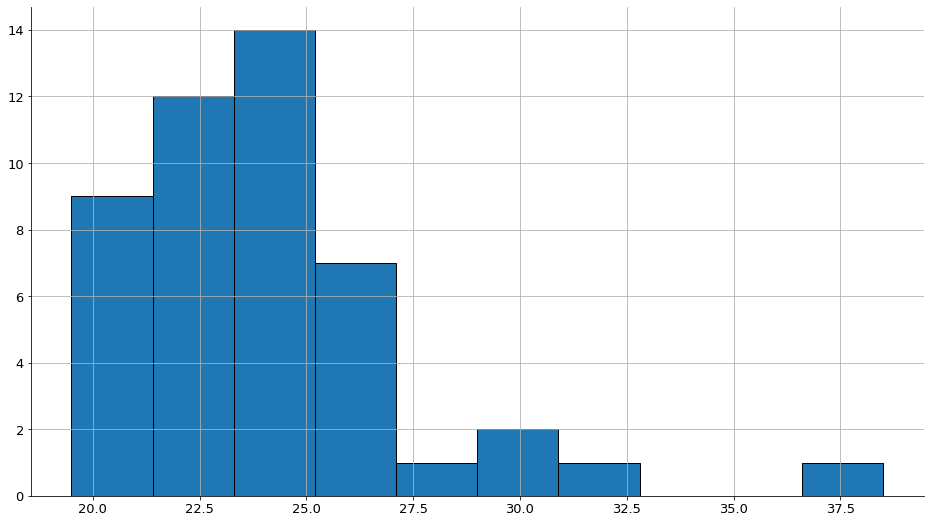

In [30]:
compact.hist()

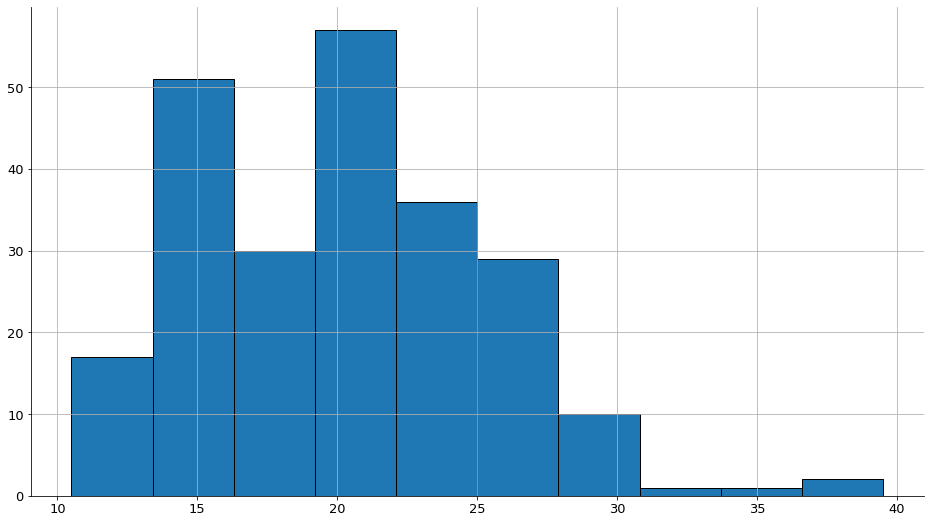

In [31]:
overall.hist()

In [32]:
print(compact.var())
print(overall.var())

12.442876965772433
25.50542900113715


In [33]:
t, p = stats.ttest_ind(compact, overall)


In [34]:
t

5.260311926248542

In [35]:
p

2.8684546158129373e-07

In [50]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


In [51]:
p/2

1.4342273079064686e-07

In [52]:
manual = mpg[mpg.trans.str.startswith('m')].combined_mileage

In [53]:
manual.head()

2     25.0
3     25.5
6     22.0
8     22.0
10    24.0
Name: combined_mileage, dtype: float64

In [54]:
auto = mpg[mpg.trans.str.startswith('a')].combined_mileage

In [55]:
auto.head()

1    23.5
4    25.5
5    21.0
7    22.5
9    20.5
Name: combined_mileage, dtype: float64

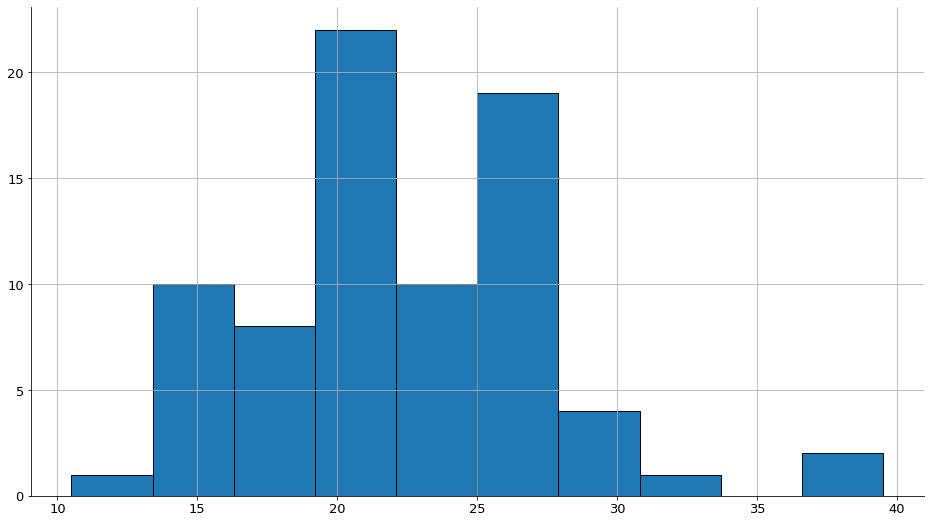

In [56]:
manual.hist()

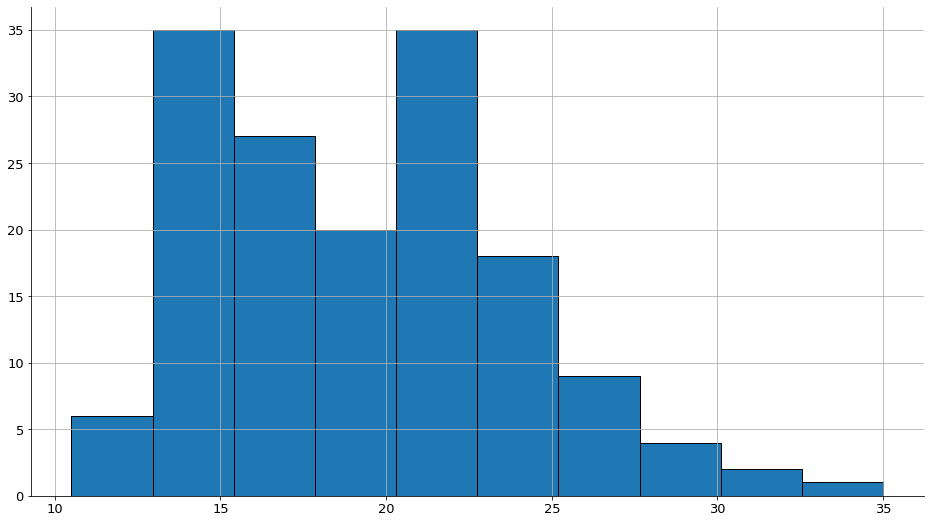

In [57]:
auto.hist()

In [58]:
print(manual.var())
print(auto.var())

26.635167464114826
21.942777233382337


In [59]:
t, p = stats.ttest_ind(compact, overall)


In [60]:
t

5.260311926248542

In [61]:
p

2.8684546158129373e-07

In [62]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


In [63]:
telco = pd.read_csv('Telco.csv')

In [64]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

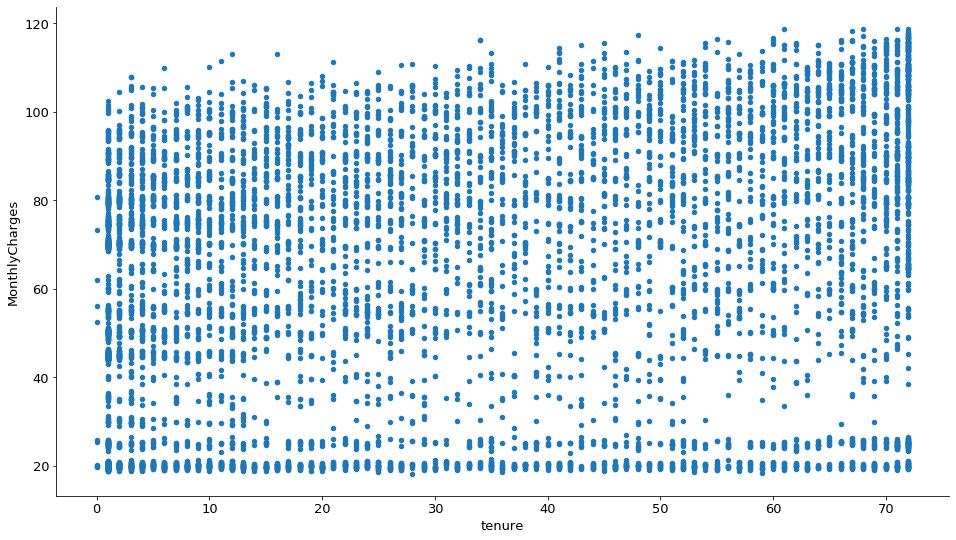

In [65]:
telco.plot.scatter(y='MonthlyCharges', x='tenure')


In [66]:
x = telco.tenure
y = telco.MonthlyCharges

In [67]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.24789985628615002
p = 4.0940449915016345e-99


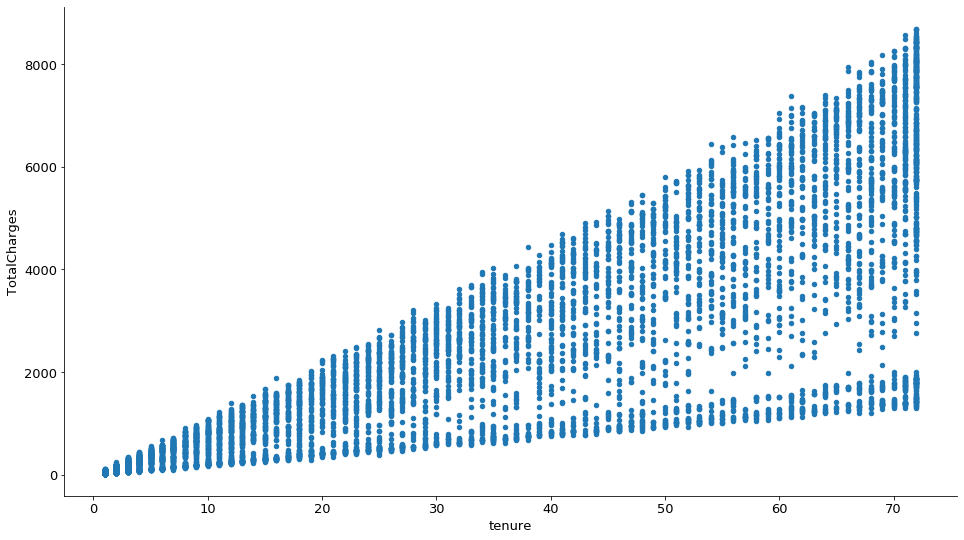

In [68]:
telco.plot.scatter(y='TotalCharges', x='tenure')

In [69]:
x = telco.tenure
y = telco.TotalCharges

In [70]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

ValueError: array must not contain infs or NaNs

In [71]:
telco.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [72]:
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [73]:
telco['TotalCharges'] = telco['TotalCharges'].fillna(0)


In [74]:
telco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [75]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.8261783979502421
p = 0.0


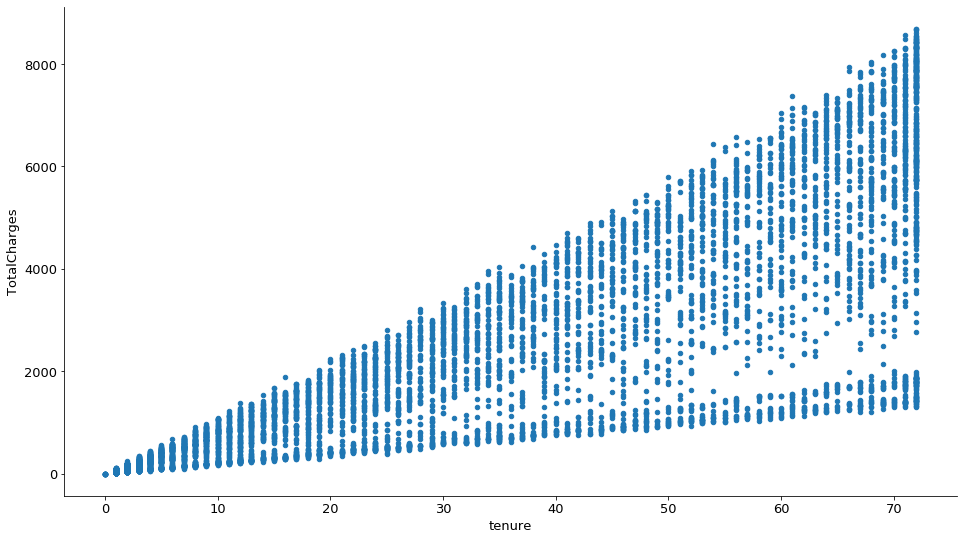

In [76]:
telco.plot.scatter(y='TotalCharges', x='tenure')

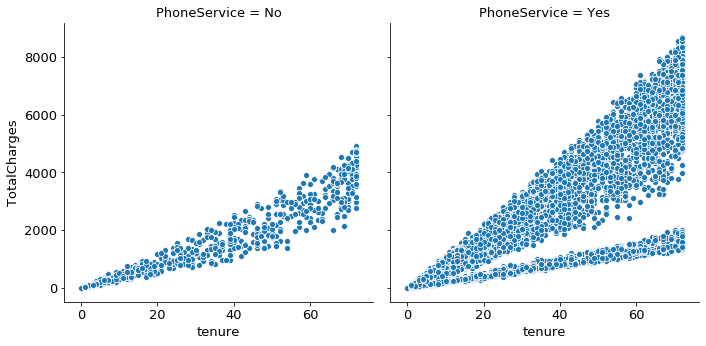

In [77]:
sns.relplot(data=telco, y='TotalCharges', x='tenure', col='PhoneService')

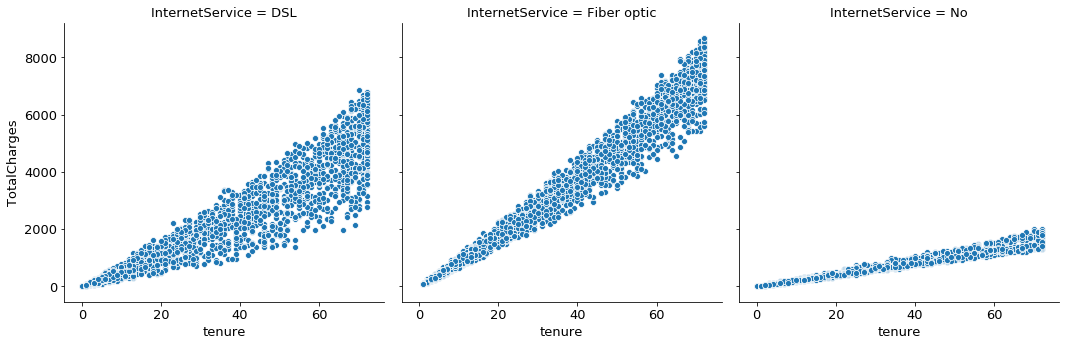

In [78]:
sns.relplot(data=telco, y='TotalCharges', x='tenure', col='InternetService')

Use the employees database.
Is there a relationship between how long an employee has been with the company and their salary?
Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [79]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [80]:
salaries = pd.read_sql('SELECT emp_no, salary, title, hire_date, salaries.to_date FROM employees JOIN salaries using(emp_no) JOIN titles using(emp_no)', url)

In [81]:
salaries

,emp_no,salary,title,hire_date,to_date
0,10001,60117,Senior Engineer,1986-06-26,1987-06-26
1,10001,62102,Senior Engineer,1986-06-26,1988-06-25
2,10001,66074,Senior Engineer,1986-06-26,1989-06-25
3,10001,66596,Senior Engineer,1986-06-26,1990-06-25
4,10001,66961,Senior Engineer,1986-06-26,1991-06-25
...,...,...,...,...,...
4638502,499999,63707,Engineer,1997-11-30,1998-11-30
4638503,499999,67043,Engineer,1997-11-30,1999-11-30
4638504,499999,70745,Engineer,1997-11-30,2000-11-29
4638505,499999,74327,Engineer,1997-11-30,2001-11-29


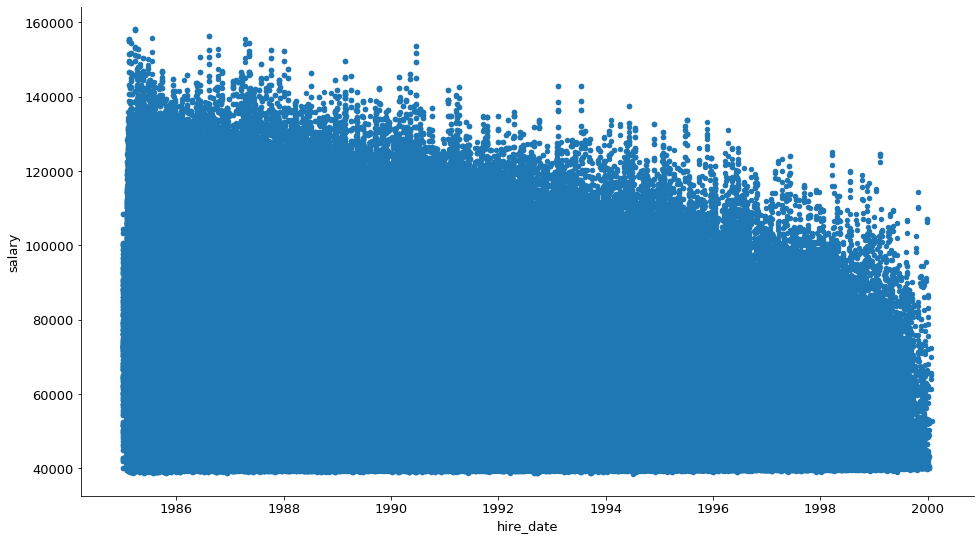

In [82]:
salaries.plot.scatter(y='salary',x='hire_date')

In [84]:
x = salaries.salary
y = salaries.hire_date

In [86]:
salaries['hire_year'] = salaries.hire_date.astype('str')

In [87]:
salaries.head()

,emp_no,salary,title,hire_date,to_date,hire_year
0,10001,60117,Senior Engineer,1986-06-26,1987-06-26,1986-06-26
1,10001,62102,Senior Engineer,1986-06-26,1988-06-25,1986-06-26
2,10001,66074,Senior Engineer,1986-06-26,1989-06-25,1986-06-26
3,10001,66596,Senior Engineer,1986-06-26,1990-06-25,1986-06-26
4,10001,66961,Senior Engineer,1986-06-26,1991-06-25,1986-06-26


In [92]:
salaries['hire_year'] = salaries.hire_year.to_string()

In [93]:
salaries.hire_year = salaries.hire_year.str.slice(0,4)

In [94]:
salaries.head()

,emp_no,salary,title,hire_date,to_date,hire_year
0,10001,60117,Senior Engineer,1986-06-26,1987-06-26,0
1,10001,62102,Senior Engineer,1986-06-26,1988-06-25,0
2,10001,66074,Senior Engineer,1986-06-26,1989-06-25,0
3,10001,66596,Senior Engineer,1986-06-26,1990-06-25,0
4,10001,66961,Senior Engineer,1986-06-26,1991-06-25,0


In [98]:
salaries['hire_year'] = salaries.hire_date.astype('str')

In [99]:
salaries.head()

,emp_no,salary,title,hire_date,to_date,hire_year
0,10001,60117,Senior Engineer,1986-06-26,1987-06-26,1986-06-26
1,10001,62102,Senior Engineer,1986-06-26,1988-06-25,1986-06-26
2,10001,66074,Senior Engineer,1986-06-26,1989-06-25,1986-06-26
3,10001,66596,Senior Engineer,1986-06-26,1990-06-25,1986-06-26
4,10001,66961,Senior Engineer,1986-06-26,1991-06-25,1986-06-26


In [101]:
salaries['hire_year'] = salaries['hire_year'].str.slice(0,4)

In [102]:
salaries.head()

,emp_no,salary,title,hire_date,to_date,hire_year
0,10001,60117,Senior Engineer,1986-06-26,1987-06-26,1986
1,10001,62102,Senior Engineer,1986-06-26,1988-06-25,1986
2,10001,66074,Senior Engineer,1986-06-26,1989-06-25,1986
3,10001,66596,Senior Engineer,1986-06-26,1990-06-25,1986
4,10001,66961,Senior Engineer,1986-06-26,1991-06-25,1986


In [103]:
salaries.hire_year = salaries.hire_year.astype('int')

In [104]:
salaries.head()

,emp_no,salary,title,hire_date,to_date,hire_year
0,10001,60117,Senior Engineer,1986-06-26,1987-06-26,1986
1,10001,62102,Senior Engineer,1986-06-26,1988-06-25,1986
2,10001,66074,Senior Engineer,1986-06-26,1989-06-25,1986
3,10001,66596,Senior Engineer,1986-06-26,1990-06-25,1986
4,10001,66961,Senior Engineer,1986-06-26,1991-06-25,1986


In [106]:
x = salaries.salary
y = salaries.hire_year

In [107]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = -0.14862876207642106
p = 0.0


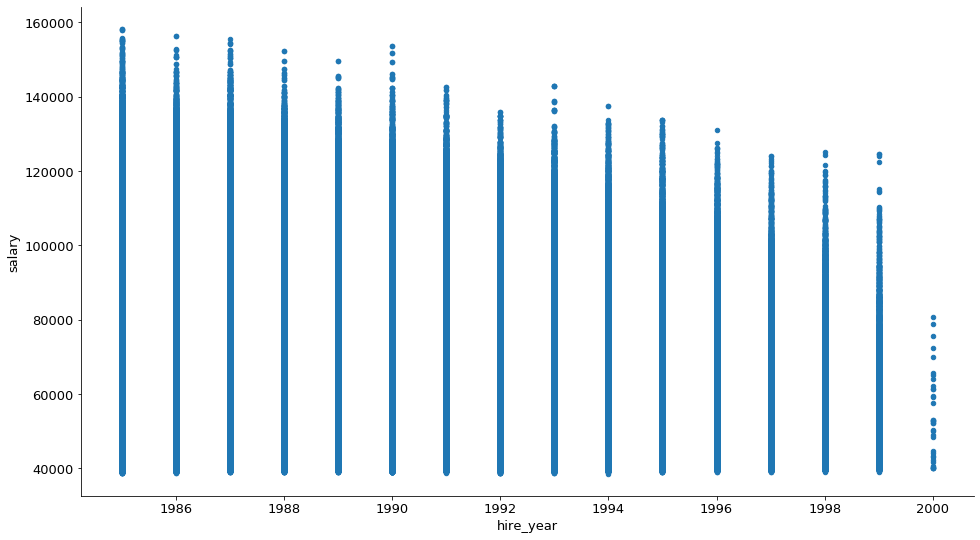

In [108]:
salaries.plot.scatter(y='salary',x='hire_year')

In [110]:
salaries.head()

,emp_no,salary,title,hire_date,to_date,hire_year
0,10001,60117,Senior Engineer,1986-06-26,1987-06-26,1986
1,10001,62102,Senior Engineer,1986-06-26,1988-06-25,1986
2,10001,66074,Senior Engineer,1986-06-26,1989-06-25,1986
3,10001,66596,Senior Engineer,1986-06-26,1990-06-25,1986
4,10001,66961,Senior Engineer,1986-06-26,1991-06-25,1986


In [124]:
salaries['to_year'] = salaries.to_date.astype('str')

In [125]:
salaries['to_year'] = salaries.to_year.to_string()

In [126]:
salaries['to_year'] = salaries['to_year'].str.slice(0,4)

In [ ]:
salaries.to_csv()

In [ ]:
salaries.head()

In [4]:
sleepstudy = data('sleepstudy')

In [5]:
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [6]:
sleepstudy.describe()

,Reaction,Days,Subject
count,180.000000,180.000000,180.000000
mean,298.507892,4.500000,341.277778
std,56.328757,2.880293,20.320905
min,194.332200,0.000000,308.000000
25%,255.375825,2.000000,331.000000
50%,288.650800,4.500000,336.000000
75%,336.752075,7.000000,352.000000
max,466.353500,9.000000,372.000000


Use the sleepstudy data. Is there a relationship between days and reaction time?

In [7]:
x= sleepstudy.Reaction
y= sleepstudy.Days

In [8]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.5352302262650253
p = 9.894096322214812e-15


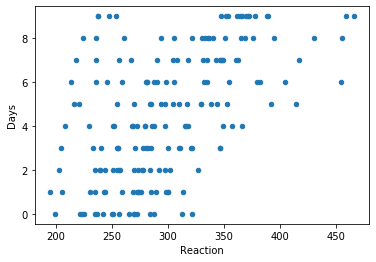

In [9]:
sleepstudy.plot.scatter(y='Days',x='Reaction')

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

-Using a Macbook and being a Codeup student are dependent.

Choose another 2 categorical variables from the mpg dataset and perform a 
c
h
i
2
 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [12]:
mpg.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

In [16]:
observed = pd.crosstab(mpg.cyl, mpg.drv)

In [17]:
observed

drv,4,f,r
cyl,,,
4,23,58,0
5,0,4,0
6,32,43,4
8,48,1,21


H0: Cyl is independent of drv.

In [18]:
alpha = .05

In [19]:
chi2, p, degf, expected = stats.chi2_contingency(observed)


In [20]:
null_hypothesis = "Cylander and drive are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We reject the null hypothesis
We reject the hypothesis that Cylander and drive are independent
6.143348809351039e-19


Use the data from the employees database to answer these questions:

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
Is an employee's gender independent of whether or not they are or have been a manager?